# Dataset modeling for Financial Time Series Data
This document aims to provide information on the research related to find the best format to represent financial time series data with certain data analysis for the usage of machine learning techniques

### On the data provided

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,1.6930,1.7412,1.6723,1.7190,1.7190,0.0
2010-01-05,1.6713,1.7370,1.6713,1.7370,1.7370,0.0
2010-01-06,1.6798,1.7359,1.6798,1.7315,1.7315,0.0
2010-01-07,1.7242,1.7472,1.6805,1.7389,1.7389,0.0
2010-01-08,1.6954,1.7492,1.6954,1.7320,1.7320,0.0


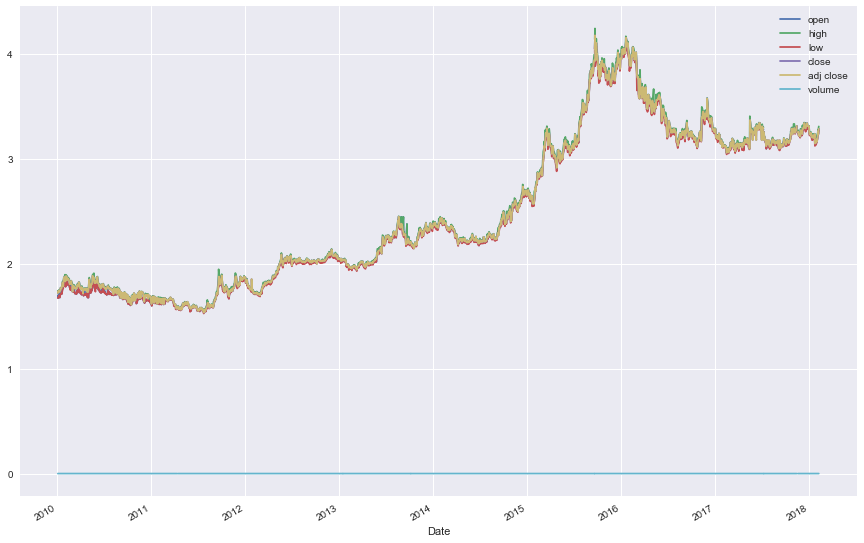

In [1]:
%matplotlib inline

import pandas as pd
import pandas_datareader as web
from IPython.core.display import display
import matplotlib.pylab as plt
from stockstats import StockDataFrame
import seaborn as sns
sns.set()

df = web.DataReader('BRL=X', 'yahoo')
data = pd.DataFrame(df)
data = StockDataFrame.retype(data)
display(data.head())
data.plot(figsize=(15,10))

### On the indicators

In [134]:
data = pd.read_csv('USDBRL/all_indicators.csv')
display(data.tail())

,Date,open,high,low,close,adj close,volume,close_20_sma,close_20_mstd,boll,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
2100,2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,0.0,3.25131,0.045347,3.25131,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2101,2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,0.0,3.24457,0.042074,3.24457,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2102,2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,0.0,3.24086,0.039202,3.24086,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2103,2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,0.0,3.23245,0.040851,3.23245,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2104,2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,0.0,3.22424,0.040712,3.22424,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


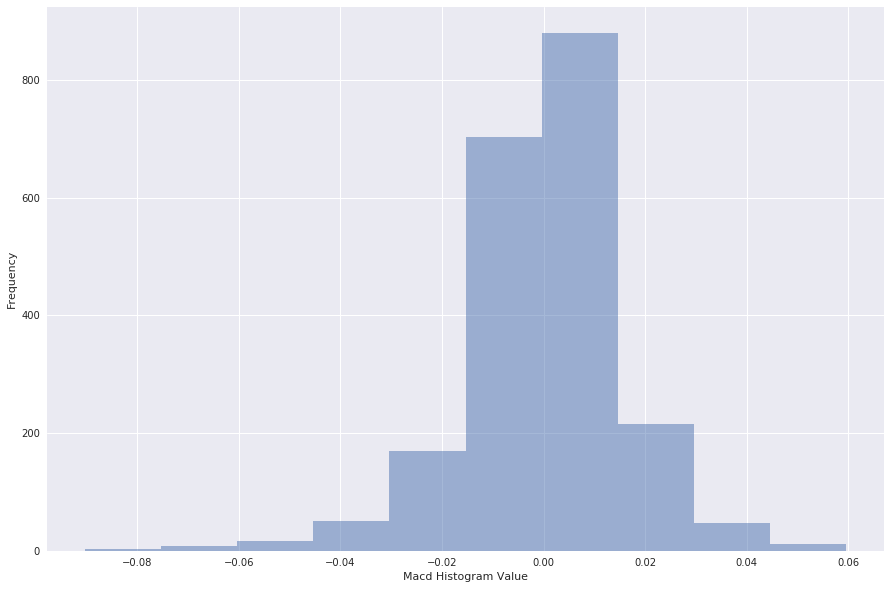

In [135]:
plt.figure(figsize=(15,10))
plt.hist(data['macdh'], alpha=0.5)
plt.xlabel("Macd Histogram Value")
plt.ylabel("Frequency")
plt.show()

### Handling missing data

In [136]:
#How much of the data is missing
counter_nan = data.isnull().sum().sort_values(ascending=False)
display(counter_nan.head())

cci_20        122
cci            86
dm             14
tr             14
high_delta     14
dtype: int64

In [137]:
display(data[counter_nan.keys()].head())

,cci_20,cci,dm,tr,high_delta,um,low_delta,close_-1_d,cr-ma3,close_-1_r,...,close_10_sma,middle_20_sma,middle_14_sma,kdjj_9,kdjd,kdjd_9,kdjk,kdjk_9,rsv_9,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.719000,1.710833,1.710833,63.828415,51.975488,51.975488,55.926463,55.926463,67.779390,2010-01-04
1,66.666667,66.666667,0.001,0.0657,-0.0042,0.0000,-0.0010,0.0180,NaN,1.047120,...,1.728000,1.712967,1.712967,90.800505,57.521919,57.521919,68.614781,68.614781,93.991416,2010-01-05
2,60.363636,60.363636,0.000,0.0572,-0.0011,0.0000,0.0085,-0.0055,NaN,-0.316638,...,1.729167,1.713889,1.713889,97.022793,63.164901,63.164901,74.450865,74.450865,86.123033,2010-01-06
3,133.333333,133.333333,0.000,0.0667,0.0113,0.0113,0.0007,0.0074,NaN,0.427375,...,1.731600,1.715967,1.715967,100.865023,68.550633,68.550633,79.322096,79.322096,89.064559,2010-01-07
4,106.533036,106.533036,0.000,0.0538,0.0020,0.0020,0.0149,-0.0069,NaN,-0.396803,...,1.731680,1.717880,1.717880,92.593848,71.985378,71.985378,78.854868,78.854868,77.920411,2010-01-08


In [138]:
from pandas.util.testing import assert_series_equal
import numpy as np

# Taking out columns that have all values as NaN or equal values
data = StockDataFrame.retype(data)
cols = data.select_dtypes([np.number]).columns
diff = data[cols].diff().sum()

data = data.drop(diff[diff==0].index, axis=1)
data = data.drop('adj close', 1)
display(data.tail())


,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


In [139]:
# test = data['cci'].isnull().keys()
# data['cci'][test] = data['cci'].shift(1)


### Normalizing the movement
Different techniques to represent a price movement can be used to select the one with best results

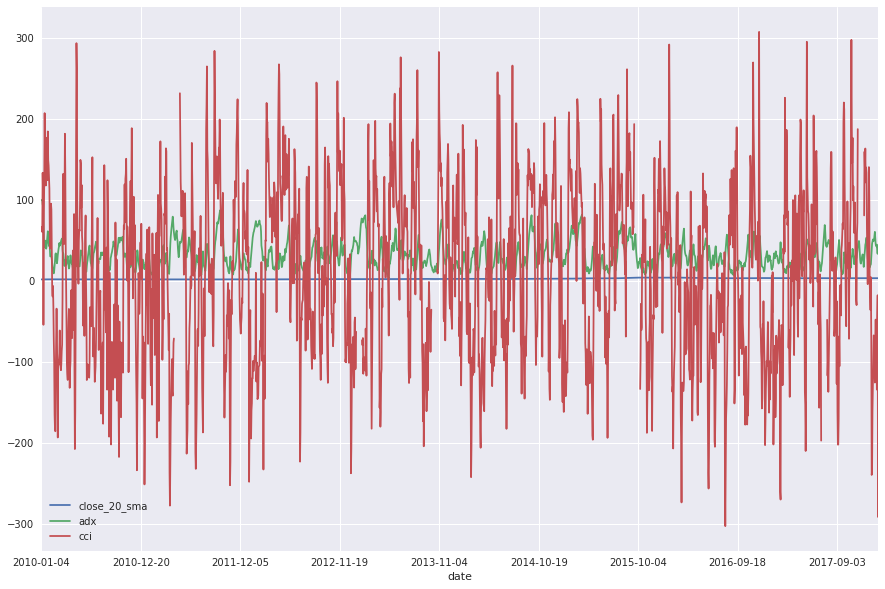

In [140]:
data.plot(x=data.index, y=['close_20_sma','adx', 'cci'], figsize=(15, 10))


#### As shown above, different indicators have different metrics, so we need to normalize in various ways and search for the best results 

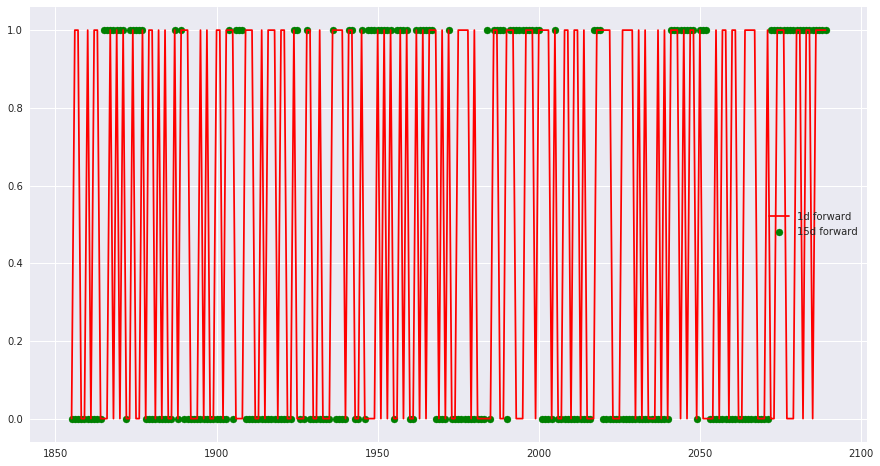

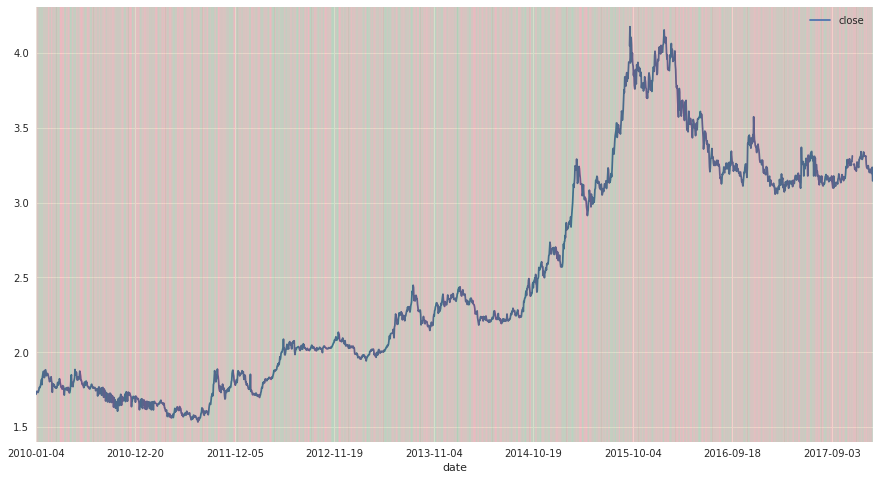

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,adx_6_ema,adxr,trix,trix_9_sma,label-1,label-2,label-15,label1,label2,label15
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,46.145262,46.145262,-0.104079,-0.070007,0,0,0,0,0,0
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,43.071678,43.071678,-0.108291,-0.079818,0,1,0,1,0,0
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,40.285819,40.285819,-0.107148,-0.087835,1,1,0,1,1,0
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,39.826478,39.826478,-0.112533,-0.094800,0,0,0,0,0,0
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,40.093430,40.093430,-0.120949,-0.101018,0,0,0,1,0,0


In [141]:
#Labeling the different window frames
##Signaling the difference between a feature datapoint and the previous/next one
       
def labelwf(dataframe, wf):
    for i in wf:
        swf = str(i)
        dataframe['label' + swf] = \
        (dataframe['close'] - dataframe['close'].shift(i))/dataframe['close'].shift(i)
        dataframe['label' + swf] = dataframe['label' + swf].apply(lambda x:1 if x>0.0 else 0)
    return dataframe
    
#Negative for looking future datapoints
#Positive for looking backwards
window_frames = [-1, -2, -15, 1, 2, 15]
data = labelwf(data, window_frames)
index = list(range(len(data)))
index = index[-250:-15]
label1 = data['label-1'].values
label1 = label1[-250:-15]
label15 = data['label-15'].values
label15 = label15[-250:-15]


fig, ax = plt.subplots(figsize=(15, 8), sharey=True)
ax.plot(index, label1, label='1d forward', color='r')
ax.scatter(index, label15, label='15d forward', color='g')
ax.legend()


data['index'] = list(range(len(data)))
data.plot(y='close', figsize=(15, 8))
for r in data.iterrows():
    if r[1]['label1'] == 1:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='g')
    else:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='r')
    
#data.plot(x=data.index, y=['label1','label2','label15'])
#data.plot(x=data.index, y=['label-1','label-2', 'label-15'])
plt.show()
data = data.drop('index', 1)
display(data.tail())


,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,change_mdi_14,change_mdi,change_dx_14,change_dx,change_dx_6_ema,change_adx,change_adx_6_ema,change_adxr,change_trix,change_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,0.180954,0.180954,3.167153,3.167153,0.263307,0.263307,0.071360,0.071360,-0.038890,-0.122912
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,-0.119273,-0.119273,-0.570478,-0.570478,0.062019,0.062019,0.069152,0.069152,0.010667,-0.091272
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,-0.243240,-0.243240,-0.459295,-0.459295,-0.138501,-0.138501,0.011534,0.011534,-0.047852,-0.073472
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,0.118755,0.118755,0.132767,0.132767,-0.051095,-0.051095,-0.006658,-0.006658,-0.069585,-0.061553
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


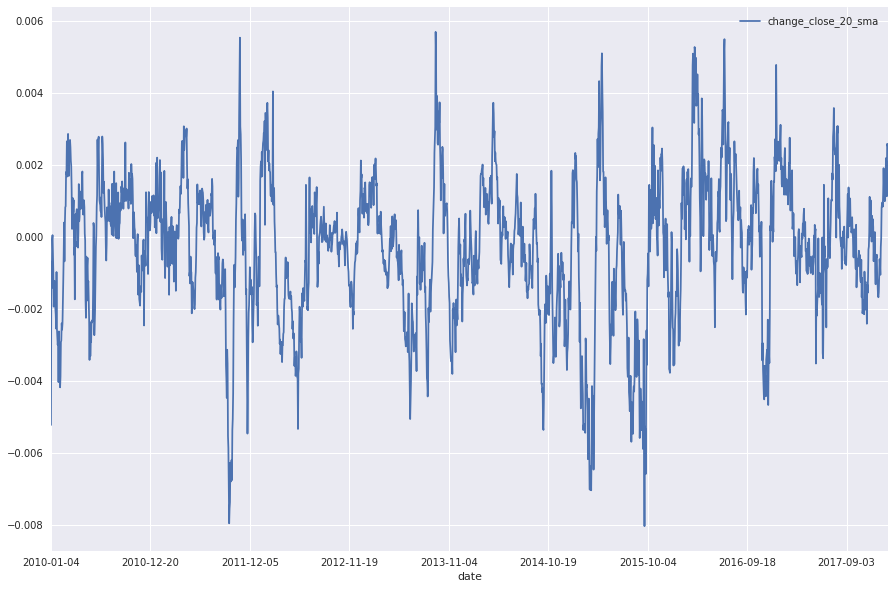

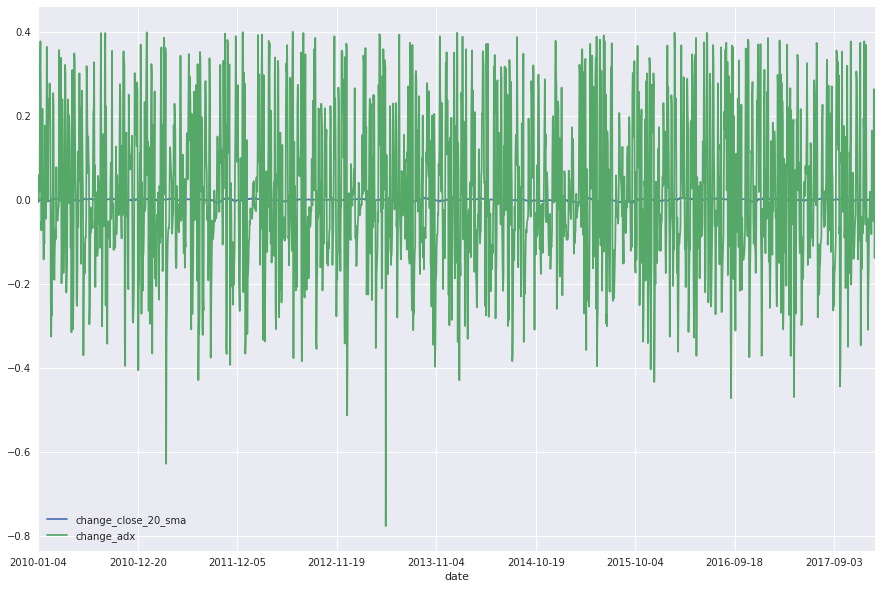

In [142]:
#Normalizing the features datapoints 
#Accordingly to its window frame

#Each datapoint to the change percentage of timeframe
def percent_change(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        else:
            dataframe['change_' + str(dataframe[feature].name)] = \
            (dataframe[feature] - dataframe[feature].shift(wf))/dataframe[feature].shift(wf)
    return dataframe

data_backup = data.copy()
data = percent_change(data, -1)
data.plot(x=data.index, y='change_close_20_sma', figsize=(15,10))
data.plot(x=data.index, y=['change_close_20_sma','change_adx'], figsize=(15,10))
                          
display(data.tail())

#### We see in the above picture that even with the percent change ratio we cant diferentiate on how much that change was significant by some orders of magnitude

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,rchange_mdi_14,rchange_mdi,rchange_dx_14,rchange_dx,rchange_dx_6_ema,rchange_adx,rchange_adx_6_ema,rchange_adxr,rchange_trix,rchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,0.108609,0.108609,0.00572,0.00572,0.223741,0.223741,0.139866,0.139866,-0.000171,-0.000187
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,-0.071588,-0.071588,-0.00103,-0.00103,0.052700,0.052700,0.135540,0.135540,0.000047,-0.000139
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,-0.145993,-0.145993,-0.00083,-0.00083,-0.117689,-0.117689,0.022606,0.022606,-0.000210,-0.000112
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,0.071277,0.071277,0.00024,0.00024,-0.043417,-0.043417,-0.013050,-0.013050,-0.000305,-0.000094
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


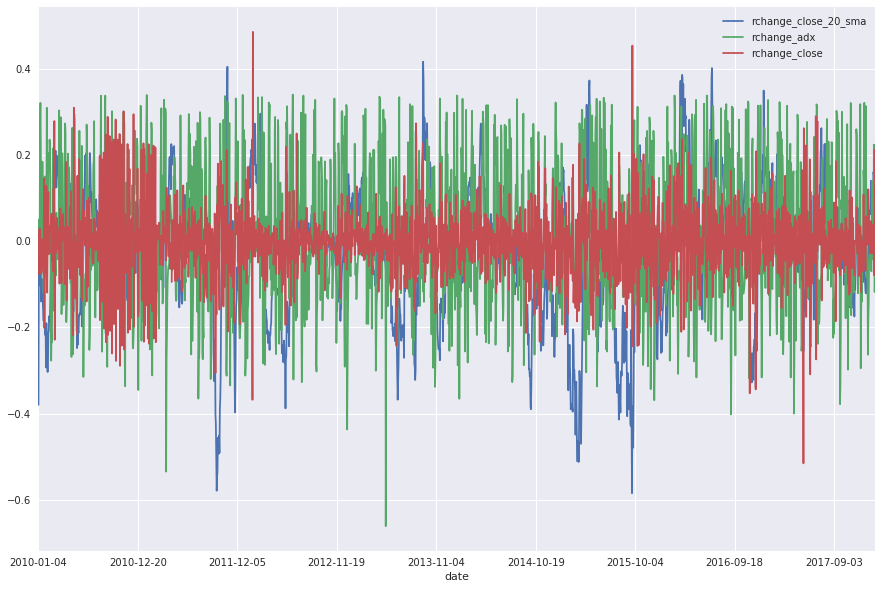

In [143]:
#How abnormal was the change compared to the feature range
def normalized_range(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        else:
            range = dataframe['change_' + str(dataframe[feature].name)].max() - \
                                              dataframe['change_' + str(dataframe[feature].name)].min()
            dataframe['rchange_' + str(dataframe[feature].name)] = \
                                              dataframe['change_' + str(dataframe[feature].name)] / range
    return dataframe
                                              

data = normalized_range(data, 1)
data.plot(x=data.index, y=['rchange_close_20_sma','rchange_adx', 'rchange_close'], figsize=(15,10))

display(data.tail())

                                        

#### As we can see, the datapoints are now expressing in a much more intuiteve manner their movements with a same axis of change

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,nchange_mdi_14,nchange_mdi,nchange_dx_14,nchange_dx,nchange_dx_6_ema,nchange_adx,nchange_adx_6_ema,nchange_adxr,nchange_trix,nchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,0.807159,0.807159,0.061377,0.061377,1.333767,1.333767,0.762940,0.762940,-0.018735,-0.034200
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,-0.733941,-0.733941,-0.125298,-0.125298,0.241040,0.241040,0.737807,0.737807,-0.006694,-0.031888
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,-1.370277,-1.370277,-0.119745,-0.119745,-0.847514,-0.847514,0.081781,0.081781,-0.020913,-0.030587
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,0.487887,0.487887,-0.090175,-0.090175,-0.373019,-0.373019,-0.125344,-0.125344,-0.026194,-0.029715
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


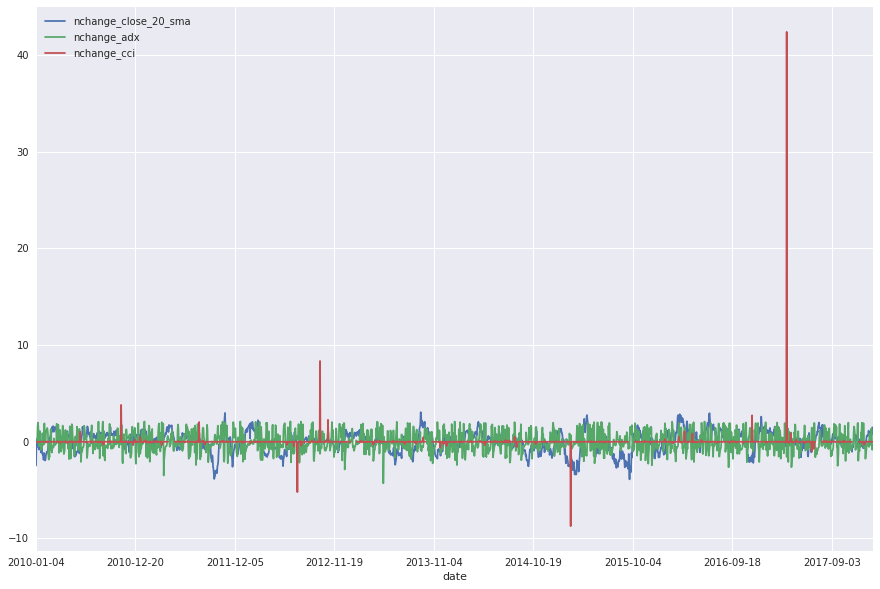

In [144]:
#How abnormal was this change percentage ratio in comparison to the others
def normalized_change(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        else:
            std = dataframe['change_' + str(dataframe[feature].name)].std()
            mean = dataframe['change_' + str(dataframe[feature].name)].mean()
            dataframe['nchange_' + str(dataframe[feature].name)] = \
            (dataframe['change_' + str(dataframe[feature].name)] - mean)/std
    return dataframe

data = normalized_change(data, 1)
data.plot(x=data.index, y=['nchange_close_20_sma','nchange_adx', 'nchange_cci'], figsize=(15, 10))
                          
display(data.tail())


#### And now, we can evaluate the order of that anomaly too

,open,high,low,close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_-1_s,...,distance_mdi_14,distance_mdi,distance_dx_14,distance_dx,distance_dx_6_ema,distance_adx,distance_adx_6_ema,distance_adxr,distance_trix,distance_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,3.2051,...,1.972931,1.972931,0.933933,0.933933,0.885917,0.885917,1.090965,1.090965,-0.853963,-0.656773
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,3.1947,...,1.350616,1.350616,-0.862305,-0.862305,0.303427,0.303427,0.875337,0.875337,-0.880698,-0.720639
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,3.2007,...,1.816355,1.816355,-0.109039,-0.109039,0.174241,0.174241,0.679895,0.679895,-0.873442,-0.772829
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,3.2355,...,3.071453,3.071453,1.012567,1.012567,0.509122,0.509122,0.647670,0.647670,-0.907627,-0.818171
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,3.1451,...,2.523730,2.523730,0.726347,0.726347,0.639317,0.639317,0.666398,0.666398,-0.961056,-0.858650


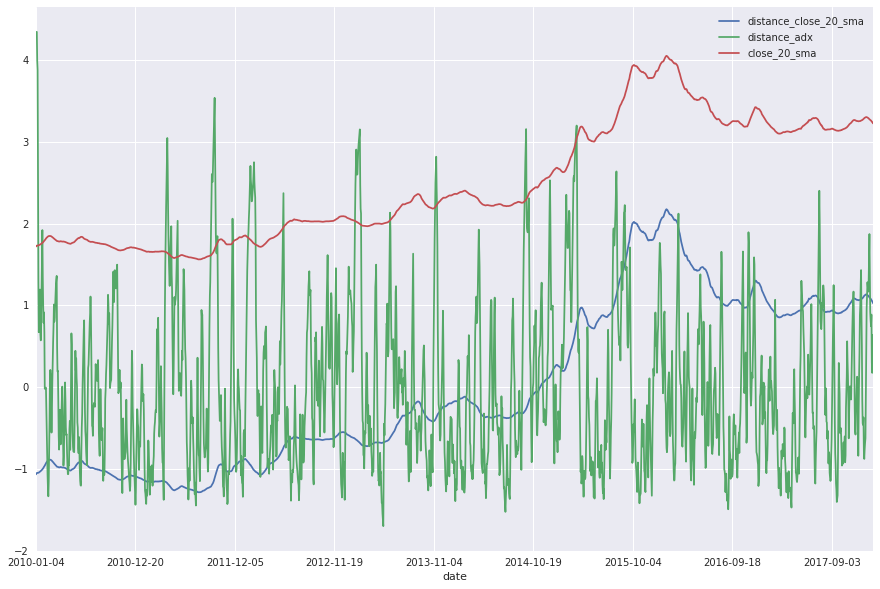

In [145]:
#How abnormal is the position that the datapoint is located at
#We substitute the original feature value for this one
def distance(dataframe):
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        elif 'distance_' in str(dataframe[feature].name):
            pass
        else:
            std = dataframe[feature].std()
            mean = dataframe[feature].mean()
            #dataframe[feature] = (dataframe[feature] - mean)/std
            dataframe['distance_' + str(dataframe[feature].name)] = (dataframe[feature] - mean)/std 
    return dataframe

data = distance(data)
data.plot(x=data.index, y=['distance_close_20_sma','distance_adx', 'close_20_sma'], figsize=(15,10))


display(data.tail())


#### And evaluate the distance of the datapoint address in comparison to the others of its kind

In [116]:
#how many columns does not have a single nan
counter_without_nan = counter_nan[counter_nan==0]
plt.hist(, alpha=0.5)
print " [+] Number of columns that does not have a nan: " + str(len(counter_without_nan))
print " [+] Number of total columns: " + str(len(data.columns))

SyntaxError: invalid syntax (<ipython-input-116-97bb7297ccd3>, line 3)

In [ ]:
#Defining at wich degree missing data is acceptable
counter_without_nan = counter_nan[counter_nan<=130]

clean_data = data[counter_without_nan.keys()]
columns = clean_data.columns

display(clean_data.tail())
display(len(data.columns))


1.0
middle_20_sma
19
Index([u'close_20_sma', u'boll', u'boll_ub', u'boll_lb', u'close_26_ema',
       u'middle_14_sma', u'middle_20_sma', u'close_10_sma', u'close_50_sma',
       u'label-15', u'distance_close_20_sma', u'distance_boll',
       u'distance_boll_ub', u'distance_boll_lb', u'distance_close_26_ema',
       u'distance_middle_14_sma', u'distance_middle_20_sma',
       u'distance_close_10_sma', u'distance_close_50_sma'],
      dtype='object')


1.0
rchange_trix_9_sma
20
Index([u'kdjj_9', u'kdjj', u'adx_6_ema', u'adxr', u'label-15', u'label1',
       u'label2', u'change_macd', u'change_trix', u'change_trix_9_sma',
       u'rchange_macd', u'rchange_trix', u'rchange_trix_9_sma',
       u'nchange_macd', u'nchange_trix', u'nchange_trix_9_sma',
       u'distance_kdjj_9', u'distance_kdjj', u'distance_adx_6_ema',
       u'distance_adxr'],
      dtype='object')


,value
nchange_trix_9_sma,0.569447
distance_kdjj_9,0.579514
distance_kdjj,0.579514
distance_adx_6_ema,0.553499
distance_adxr,0.553499


                       value
kdjj_9              0.579514
kdjj                0.579514
adx_6_ema           0.553499
adxr                0.553499
label-15            1.000000
label1              0.635023
label2              0.635105
change_macd         0.969121
change_trix         0.872862
change_trix_9_sma   0.569447
rchange_macd        0.969121
rchange_trix        0.872862
rchange_trix_9_sma  0.569447
nchange_macd        0.969121
nchange_trix        0.872862
nchange_trix_9_sma  0.569447
distance_kdjj_9     0.579514
distance_kdjj       0.579514
distance_adx_6_ema  0.553499
distance_adxr       0.553499


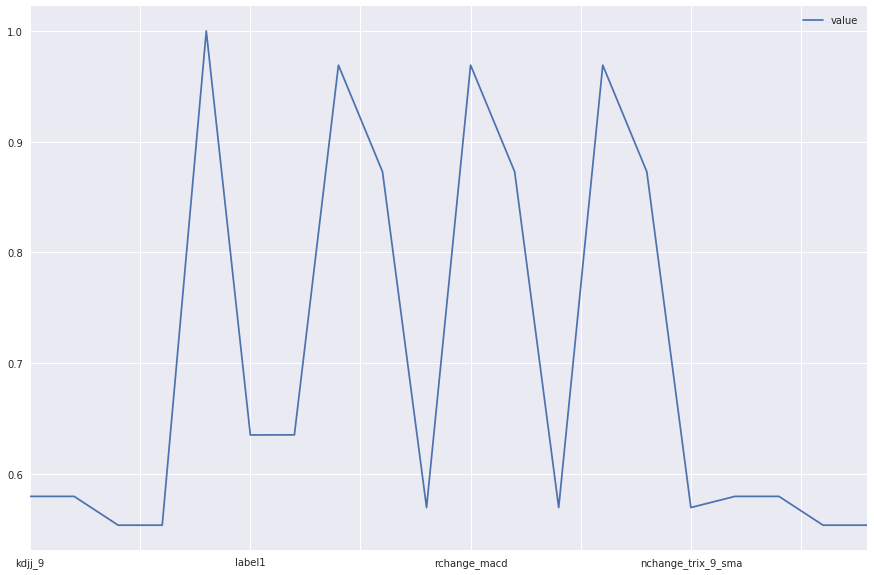

In [118]:
import numpy as np
from sklearn.feature_selection import f_regression, mutual_info_regression

test = data.copy()
test = test[20:-20]
counter_nan = test.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
test = test[counter_without_nan.keys()]
mi = mutual_info_regression(test, test['label-15'], discrete_features='auto')
#print test.columns
mi /= np.max(mi)
result = test.columns[mi > 0.1]
mi = mi[mi > 0.1]
print mi.max()
print result.max()
print len(result)
print result

print "\n"

ftest, _ = f_regression(test, test['label-15'])
ftest /= np.max(ftest)
_[np.isnan(_)] = 0.0
f = _[~np.isnan(_)]
result = test.columns[f > 0.5]
f = f[f > 0.5]
print f.max()
print result.max()
print len(result)
print result

f_df = pd.DataFrame(index=result, columns=['value'])
f_df['value'] = f
f_df.plot(figsize=(15,10))
display(f_df.tail())
print f_df


In [119]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [166]:
teste = add_interactions(test)
print (teste.head(5))

   close_20_sma  close_20_mstd      boll   boll_ub   boll_lb      rs_6  \
0      1.784935       0.049643  1.784935  1.884222  1.685648  2.720917   
1      1.789605       0.049289  1.789605  1.888182  1.691028  1.086033   
2      1.795530       0.049058  1.795530  1.893646  1.697414  1.527663   
3      1.802605       0.050639  1.802605  1.903883  1.701327  2.349637   
4      1.810140       0.050792  1.810140  1.911724  1.708556  2.424263   

       rsi_6     rs_12     rsi_12  close_26_ema  \
0  73.124907  3.068975  75.423784      1.803677   
1  52.062119  1.577914  61.208950      1.806103   
2  60.437771  1.902550  65.547538      1.810022   
3  70.146018  2.451841  71.029955      1.816211   
4  70.796639  2.497178  71.405513      1.821978   

                 ...                  distance_adx_distance_adx_6_ema  \
0                ...                                         1.089474   
1                ...                                         0.709913   
2                ...         

              0             1            2            3            4  \
0   1521.738886 -31020.438062 -2092.460701  2481.681543  2742.452257   
1  -7334.025285 -14779.039981  1154.793412  3394.712320 -2553.245712   
2 -10414.717366 -10920.544110   -30.076753 -4975.789962 -9297.178085   
3  -3130.356502 -20977.330189  -520.478478 -3437.677230 -3281.527651   
4  -1915.900922 -23721.426716   -98.622564 -5381.922215 -2843.044078   

              5            6            7            8           9  
0 -12751.049568 -4005.795185  7736.526408 -1314.443082 -953.668629  
1 -12163.995979 -5581.900956  1774.381537  2063.146563 -270.836689  
2  -9968.077350 -3005.344810  1149.326167  5464.634291  395.783388  
3  -7926.043366 -1672.127083  3822.251899 -1241.876236 -173.374559  
4  -8244.719689  -750.179815  4322.097702 -1994.708665 -355.220283  


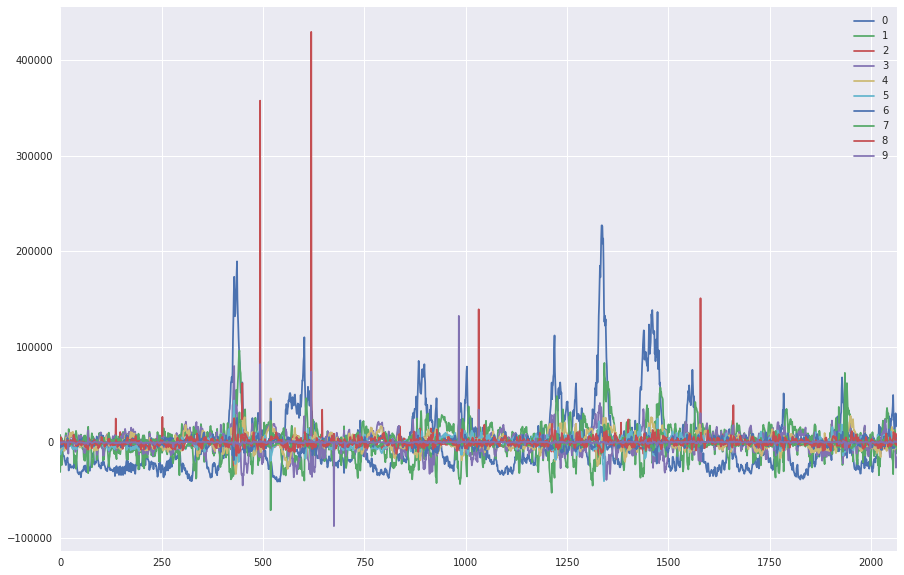

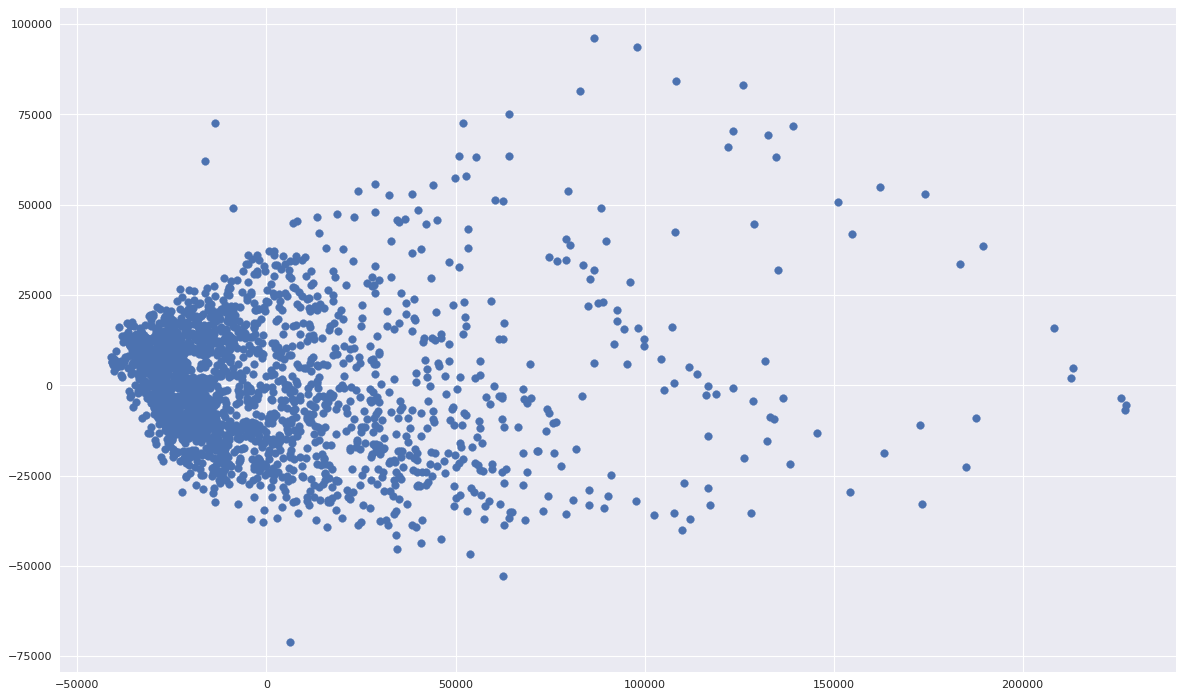

In [169]:
from sklearn.decomposition import PCA



pca = PCA(n_components=10)
data_pca = pd.DataFrame(pca.fit_transform(teste))
print (data_pca.head(5))
data_pca.plot(figsize=(15,10))

datatest = PCA().fit_transform(teste)
plt.figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(datatest[:, 0], datatest[:, 1])
plt.show()

### T - Distributed Stochastic Neighboor Embedding
Transforming the data into a Similarity Matrix for comparing the similarity of a certain datapoint with the rest

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

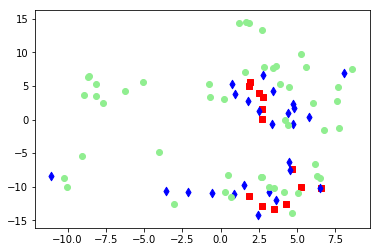

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

data['nlabel'] = data['label1'] + data['label2'] + data['label15'] + data['label-1'] + data['label-2'] + data['label-15']
#print data['nlabel']

counter_nan = data.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
data = data[counter_without_nan.keys()]
columns = data.columns

x = data.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

y = data.ix[:,-1].values
class_labes = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=test_percentage, random_state=0)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

markers=('s', 'd', 'o', 'ˆ', 'v', '.')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan', 5:'black', 6:'yellow'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt

# step 1: download the data
dataframe_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")
num_rows = dataframe_all.shape[0]

# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]
# remove the first 7 columns which contain no discriminative information
dataframe_all = dataframe_all.ix[:,7:]
# the list of columns (the last column is the class label)
columns = dataframe_all.columns

# step 3: get features (x) and scale the features
# get x and convert it to numpy array
x = dataframe_all.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

# step 4: get class labels y and then encode it into number 
# get class label data
y = dataframe_all.ix[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# step 5: split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

# scatter plot the sample points among 5 classes
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()



,open,high,low,close,adj close,volume,ds,y
Date,,,,,,,,
2018-02-05,3.2169,3.2455,3.2138,3.2154,3.2154,0.0,2018-02-05,1.167952
2018-02-06,3.2611,3.2759,3.2175,3.2611,3.2611,0.0,2018-02-06,1.182065
2018-02-07,3.2333,3.2630,3.2314,3.2334,3.2334,0.0,2018-02-07,1.173534
2018-02-08,3.2696,3.2926,3.2562,3.2699,3.2699,0.0,2018-02-08,1.184759
2018-02-09,3.2844,3.3075,3.2708,3.2846,3.2846,0.0,2018-02-09,1.189245


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Library/Python/2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


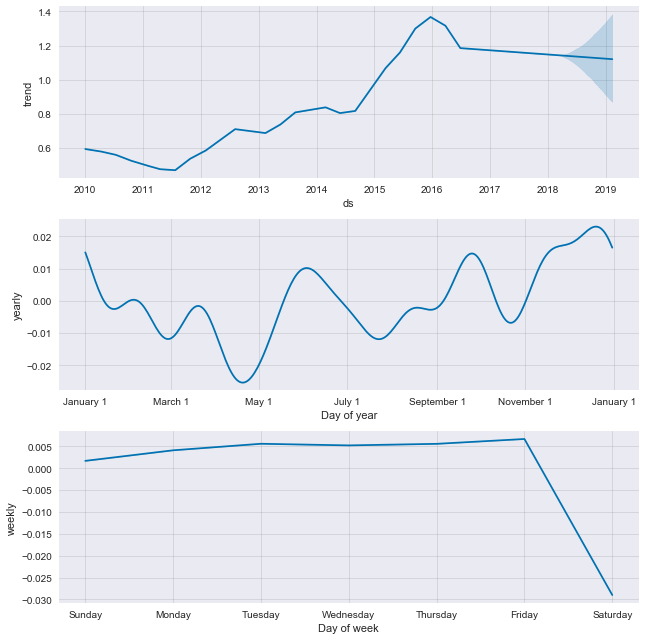

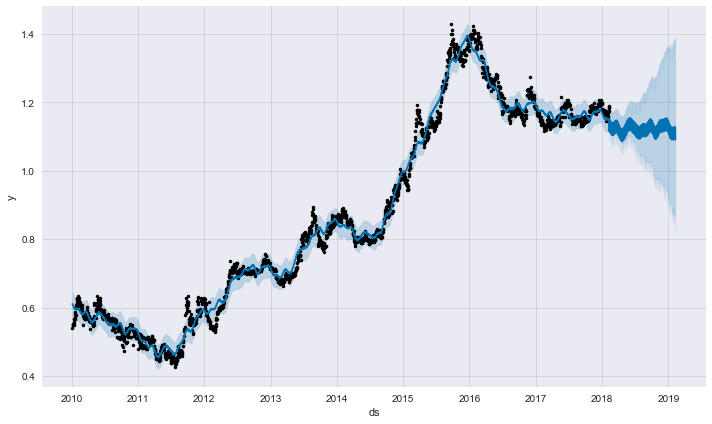

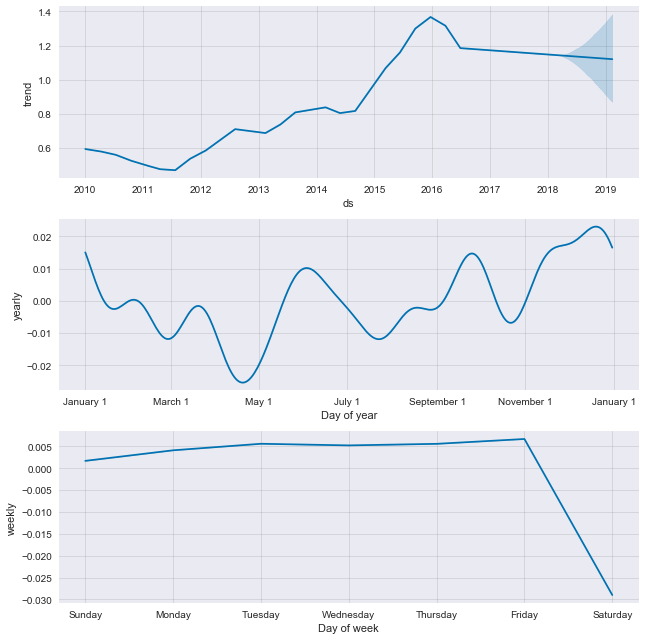

In [2]:
from fbprophet import Prophet
import numpy as np

test = data.copy()
test['ds'] = data.index
test['y'] = np.log(data['close'])
display(test.tail())
m = Prophet()
m.fit(test)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
m.plot(forecast)
m.plot_components(forecast)